In [1]:
import os
import pandas as pd
snmem="/gpfs/scratch/ahurtado/large_polar_low"
ahurt="/home/adrianhurtado/testing/madness-test-suite/large_polar_low/"
os.chdir(ahurt)
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()
dalton_reader.Np=4

In [2]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [3]:
import json
converged=[]
not_converged=[]
not_found=[]
Type_Error=[]
json_error=[]
for g in glob.glob('molecules/*.mol'):
    m = g.split('/')
    mol = m[1].split('.')[0]
    print(mol)
    try:
        ben=FrequencyData(mol,'hf','dipole')
        if ben.converged.all() and ben.converged.sum()==5:
            converged.append(mol)
        else:
            not_converged.append(mol)
    except FileNotFoundError as f:
        print(mol,f)
        not_found.append(mol)
    except TypeError as f:
        print(mol,f)
        Type_Error.append(mol)
    except json.decoder.JSONDecodeError as j:
        json_error.append(mol)
        print(mol,j)
        
            


CSO
LiH
FCN
P2H4
OCl2
LiH_s
SH2
Li2
NaCl
C2H2
BH3
HCONH2
CH3SH
P2
BH2Cl
NaCN
HCN
CH3OH
HBS
C2H4
SO2
HNC
Na2
F2
N2
SiH4
N2H2
CH3NH2
NH3O
HOF
He
HF
OF2
ClF
HCOOH
NH3
CH3Cl
Mg2
N2H4
0.0611185  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H4/dipole_hf_0-061118/response_base.json'
Ne
HCHO
SiH3Cl
SF2
SiH3F
HOCl
HOOH
H2
HCl
HCCF
Mg
CH2BH
CH3BH2
BF
SiO
FNO
H2O
S2H2
LiCl
LiCl Expecting value: line 1 column 1 (char 0)
PH3O
Ar
BHF2
HNS
O3
HBO
Cl2
C6H6
NH2Cl
LiCN
CO
CS
LiBH4
CH4
BeH2
BH2F
CH2NH
CH3F
CO2
PH3
ClCN
HCHS
NaLi
SCl2
Be
NH2OH
HCCCl
NaH
NH2F
HNO
HCP
NOCl


In [4]:
num_c=len(converged)
num_n=len(not_converged)
num_nf=len(not_found)
num_json_e=len(json_error)
num_type_e=len(Type_Error)

total=num_c+num_n+num_nf+num_json_e+num_type_e
print("converged : ",num_c)
print("not converged : ",num_n)
print("not found : ",num_nf)
print("json error : ",num_json_e)
print("type error : ",num_type_e)
print("total : ",total)


converged :  38
not converged :  51
not found :  0
json error :  1
type error :  0
total :  90


In [5]:
non_converged=[]
part_converged=[]
if True:
    for mol in not_converged:
        check=FrequencyData(mol,'hf','dipole')
        if(check.converged.any()):
            #print(mol,'\n',check.converged)
            part_converged.append(mol)
        else:
            non_converged.append(mol)
num_non_converged=len(non_converged)
num_part_converged=len(part_converged)

            

0.0611185  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H4/dipole_hf_0-061118/response_base.json'


In [9]:
print("Part Converged : ",num_part_converged)
print("Not Converged : ",num_non_converged)

Part Converged :  13
Not Converged :  38


OCl2
 converged:  0.0              True
0.0088695625     True
0.017739125      True
0.03547825       True
0.0709565       False
dtype: bool


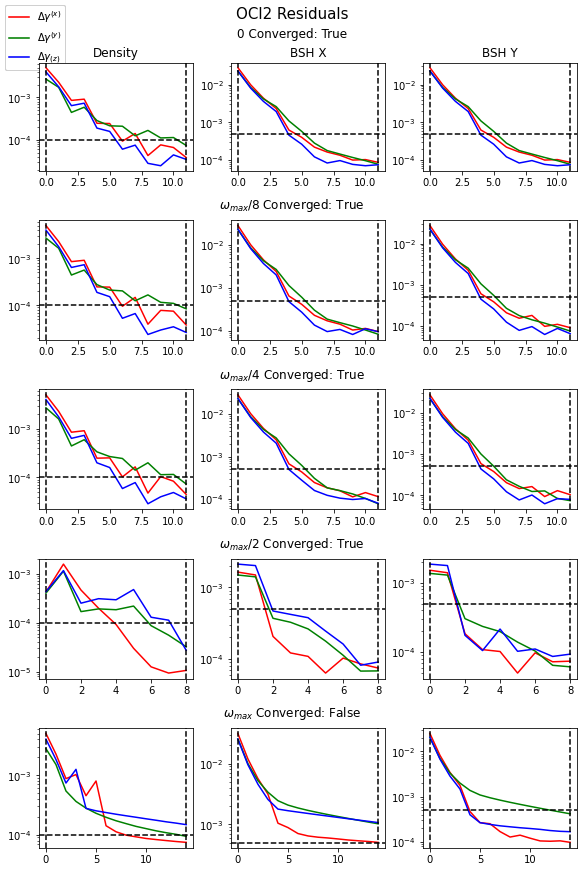

In [8]:
display_convergence_plots(part_converged[0],'hf','dipole',False)

In [ ]:
print("Not at all converged : ",num_non_converged)

CO converged:  0.0             False
0.0201593125    False
0.040318625     False
0.08063725      False
0.1612745       False
dtype: bool


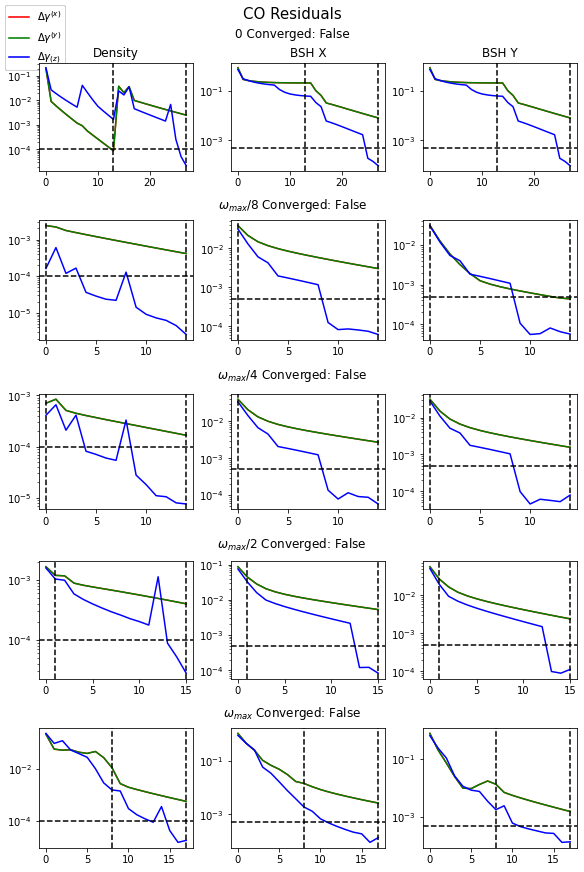

In [83]:
display_convergence_plots(non_converged[17],'hf','dipole',False)